# MF-DFA Analysis
### By: Daniel Serrano

In this notebook, we are going to show a short example of how can we apply the MF-DFA technique to determine the scaling properties and the detection of long-range auto-correlations in time series. This method was first proposed by Peng, et al (1994) as detrended fluctuation analysis and then generalized to a multi fractal detrended fluctuation analysis by Kantelthardt, et al (2002). Here we will use the one proposed by Kantelhardt.

### MF-DFA library

We will use the MF-DFA library avalaible at https://github.com/LRydin/MFDFA which very precisely takes the proposed method to code, and later we will plot and analyze the results to draw conclusions.

The end goal is, based on the hurst exponents, determine whether there exists a positive or negative auto-correlation between the data.

## Step by step

We begin by loading the necessary libraries. We will be using pandas, numpy and MFDFA and matplotlib to plot the results.

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from MFDFA import MFDFA

We then select the data to be analyzed.

In [56]:
stations_data = pd.read_csv("data/hourly_data.csv")
print(stations_data.columns)

Index(['date_time', 'sta_18_dir_viento_max', 'sta_18_dir_viento_mean',
       'sta_18_dir_viento_median', 'sta_18_dir_viento_min',
       'sta_18_dir_viento_nearest', 'sta_18_dir_viento_std', 'sta_18_hum_max',
       'sta_18_hum_mean', 'sta_18_hum_median',
       ...
       'sta_31_temp_median', 'sta_31_temp_min', 'sta_31_temp_nearest',
       'sta_31_temp_std', 'sta_31_vel_viento_max', 'sta_31_vel_viento_mean',
       'sta_31_vel_viento_median', 'sta_31_vel_viento_min',
       'sta_31_vel_viento_nearest', 'sta_31_vel_viento_std'],
      dtype='object', length=589)
date_time
sta_18_dir_viento_max
sta_18_dir_viento_mean
sta_18_dir_viento_median
sta_18_dir_viento_min
sta_18_dir_viento_nearest
sta_18_dir_viento_std
sta_18_hum_max
sta_18_hum_mean
sta_18_hum_median
sta_18_hum_min
sta_18_hum_nearest
sta_18_hum_std
sta_18_ppt_max
sta_18_ppt_mean
sta_18_ppt_median
sta_18_ppt_min
sta_18_ppt_std
sta_18_ppt_sum
sta_18_pres_max
sta_18_pres_mean
sta_18_pres_median
sta_18_pres_min
sta_18_pres_neares

For the purpose of this example, we will be analyzing the mean statistic of station 18 and 28, using the data of their humidity and temperature variable respectively.

In [17]:
stat_18_hum = stations_data['sta_18_hum_mean'].values
stat_28_temp = stations_data['sta_28_temp_mean'].values

print(stat_18_hum)
print(stat_28_temp)

[77.41666667 84.36363636 83.75       ... 85.08333333 82.28571429
 86.51759949]
[14.91166667 14.68083333 14.1525     ... 21.40833333 21.21181818
 19.80703435]


Now we must the define the length <em>s</em> in which we will partition the data. According to Kantelthardt: "<em>For very large scales, s > N=4; Fq(s) becomes statistically unreliable because the number of segments Ns for the averaging procedure in step 4 [of the method] becomes very small. Thus, we usually exclude scales s > N/4 from the fitting procedure to determine h(q)." </em> Where N is the total data we have.

In [18]:
print(stat_18_hum.size)

77341


s/4 = 19335, so we will partition the data using <em>np.logspace</em> to evenly space the segments. The smallest segment will be of size 100 and the biggest segment will be of size 19335, we will use 500 segments.

In [21]:
segments = np.logspace(start=np.log(100), stop=np.log(19335), base=np.e, num=500).astype(int)
print(segments)

[  100   101   102   103   104   105   106   107   108   109   111   112
   113   114   115   117   118   119   120   122   123   124   126   127
   128   130   131   132   134   135   137   138   140   141   143   144
   146   147   149   150   152   154   155   157   159   160   162   164
   165   167   169   171   173   174   176   178   180   182   184   186
   188   190   192   194   196   198   200   202   204   207   209   211
   213   216   218   220   222   225   227   230   232   235   237   240
   242   245   247   250   253   255   258   261   263   266   269   272
   275   278   281   284   287   290   293   296   299   302   305   309
   312   315   319   322   325   329   332   336   340   343   347   350
   354   358   362   366   369   373   377   381   385   389   394   398
   402   406   411   415   419   424   428   433   437   442   447   452
   456   461   466   471   476   481   486   491   497   502   507   513
   518   524   529   535   540   546   552   558   

We can now use the MFDFA analysis to calculate the fluctuations for every <em>q</em> order (for q=2 we retrieve the standard detrended fluctuation analysis). We will use q = [-10, -2, -0.2, 0.2, 2, 10].

In [32]:
q_order = np.array([-10, -2, -0.2, 0.2, 2, 10])

_, fluct_s18 = MFDFA(timeseries=stat_18_hum, lag=segments, q=q_order, order=1)
_, fluct_s28 = MFDFA(timeseries=stat_28_temp, lag=segments, q=q_order, order=1)

We are able now to use these <em>fluct</em> to calculate the corresponding hurst exponents, and determine the long range auto-correlation between the data. We will do so by the fitting polynomial method.

In [40]:
hurst_s18, _ = np.polyfit(
        np.log(
            segments[:len(fluct_s18)]), np.log(fluct_s18), 1
    )

hurst_s28, _ = np.polyfit(
        np.log(
            segments[:len(fluct_s28)]), np.log(fluct_s28), 1
    )

At last, we plot the hurst exponents and analyze the results.

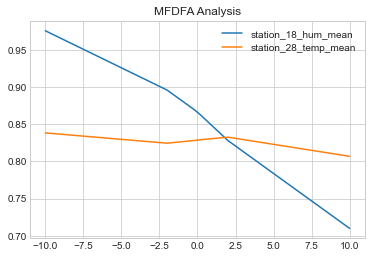

In [55]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
plt.plot(q_order, hurst_s18, label='station_18_hum_mean')
plt.plot(q_order, hurst_s28, label='station_28_temp_mean')
plt.title("MFDFA Analysis")
plt.legend()

# Results

As we can see, we obtained hurst exponents > 0.5 for every <em>q order</em> which means there exists a positive auto-correlation between the data, i.e, the tendency is prone to stay the same, this is, if the values are increasing, they are expected to keep increasing, likewise if they are decreasing.

We have exposed here in a simple example, how we can use the MF-DFA method to obtain valuable information from raw data. We have showed step by step how we can apply the MFDFA library in order to obtain information useful for various purposes, one of them, for example, could be predicting the weather. 

This is only one exihibit of how powerful a few lines of code can be when combined with proper knowledge from academic literature.